# Compound Interest Calculation

$$dB(t) = rB(t)dt$$
$$r = 1.75\%$$
$$ B(0) =  10$$

### Discretization: Revizited
$$ B(t_i) - B(t_{i-1}) = r \Delta t \left( B(t_{i-1}\right))$$
$$ B(t_i)  = B(t_{i-1}) \left(1 + r\Delta t \right)$$
$$ B(t_0) = capital$$

$$\Rightarrow B(t_n) = capital \cdot (1 + r\Delta t)^n$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r = 0.0175
T = 2
capital = 10

n = 10000
B_t = np.zeros(n+1)
dt = np.linspace(0,T,n+1)
B_t[0] = capital
for i in range(0,n):
    B_t[i+1] = B_t[i] + r*B_t[i]*(dt[i+1]-dt[i])

print("Money in " + str(T) + " years = " + str(B_t[-1]))

#analytic formula
analyticValue = capital * np.exp(r * T)

#price with vectorization:
FinalValue = capital * pow(1+r*T/n,n)

print("Back testing the results with analytic formula: " + str(analyticValue))
print("Differences: " + str(B_t[-1]-analyticValue))
print("Back testing with vectorized result: "+ str(B_t[-1]-FinalValue))


Money in 2 years = 10.356196453680624
Back testing the results with analytic formula: 10.356197087996232
Differences: -6.3431560803906e-07
Back testing with vectorized result: -4.709121981250064e-12


## Heat Equation Solver
$$\frac{\partial f(t,x)}{\partial t} = \frac{1}{2}\sigma^2\frac{\partial^2 f(t,x)}{\partial^2 x}$$
$$ f(t_0,x) = g(x)$$
$$ f(t,x_0) = 0$$
$$ f(T,x) = 0$$
### Discretization

Solution is searched on $$(t_0,T)$$ time interval and on $$(x_0,x_T)$$ space interval


Let's assume $n+1$ time steps
$$ t_0\leq t_1\leq t_2\leq ...t_n=T$$
and $m+1$ space steps
$$ x_0 \leq x_1 \leq x_2 \leq ... \leq X_m = x_T$$

#### Discretization scheme:

$$ \frac{f(t_{i+1},x_j) - f(t_{i}, x_j) }{\Delta t}= \frac{1}{2}\sigma^2 \frac{f(t_i,x_{j+1}) - 
2f(t_i,x_j) +f(t_i,x_{j-1})}{(\Delta x)^2}$$

$$\Rightarrow f(t_{i+1},x_j) = f(t_{i}, x_j) + \frac{1}{2}\sigma^2 \frac{\Delta t}{(\Delta x)^2}\left(f(t_i,x_{j+1}) - 
2f(t_i,x_j) +f(t_i,x_{j-1}) \right)$$

We know the boundaries:
$$
f(t_i,x_0) = 0 \quad \forall i\in [1,n]\cap \mathrm(Z)
$$
$$
f(t_n,x_j) = 0 \quad \forall j\in [1,m]\cap \mathrm(Z)
$$
$$
f(t_0,x_j) = g(x_j)\quad \forall j\in [1,m]\cap \mathrm(Z)
$$


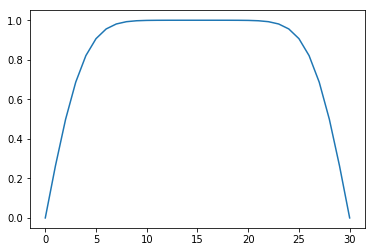

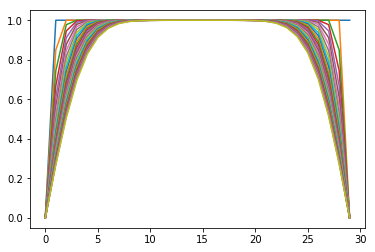

In [4]:
sigma = 0.2
x_max = 2
t_max = 1
T0 = 1
N = 30
M = 30

def heatEquationBenchmark(L,T,Nx,Nt,a,T0):
    x = np.linspace(0, L, Nx+1)    # mesh points in space
    dx = x[1] - x[0]
    t = np.linspace(0, T, Nt+1)    # mesh points in time
    dt = t[1] - t[0]
    F = 0.5*a*a*dt/(dx**2)
    f   = np.zeros(Nx+1)           # unknown f at new time level
    # Set initial condition u(x,0) = g(x)=T0
    f_n = np.zeros(Nx+1)+T0           # f at the previous time level
    
        
    for n in range(0, Nt):
        # Compute u at inner mesh points
        for i in range(1, Nx):
            f[i] = f_n[i] + F*(f_n[i-1] - 2*f_n[i] + f_n[i+1]) 

        # Insert boundary conditions
        f[0] = 0;  f[Nx] = 0
        # Update u_n before next step
        f_n[:]= f
    return f_n

u = heatEquationBenchmark(x_max,t_max,M,N,sigma,T0)

def heatEquationSolver(N,M,t_max,x_max,sigma,T0):
    dx = x_max/M
    dt = t_max/N
    s = 0.5*(sigma**2)*(dt/(dx**2))
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    f = np.zeros([N,M])
    f[0,:] = T0
    f[:,0] = 0
    for n in range(0,N-1):
        for m in range(1,M-1):
            f[n+1,m] = f[n,m] + s*(f[n,m+1] - 2*f[n,m] + f[n,m-1])
    return t,f,s

t,f,s = heatEquationSolver(N,M,t_max,x_max,sigma,T0)


plt.plot(u)
plt.show()

for i in np.arange(0,N-1):
    plt.plot(f[i,:])
plt.show()


## Revisit the discretized heat equation


$$ f(t_{i+1},x_j) = f(t_{i}, x_j) + \frac{1}{2}\sigma^2 \frac{\Delta t}{(\Delta x)^2}\left(f(t_i,x_{j+1}) - 
2f(t_i,x_j) +f(t_i,x_{j-1}) \right)$$
$$ \alpha := \frac{1}{2}\sigma^2 \frac{\Delta t}{(\Delta x)^2}$$
$$ f(i,j) := f(t_{i}, x_{j})$$

$$f(i+1,j) = f(i,j) + \alpha\left(f(i,j+1) - 2f(i,j) +f(i,j-1) \right)$$
$$f(i+1,j) = \alpha f(i, j+1) + (1-2\alpha)f(i,j) + \alpha f(i,j-1)  $$
$$i\in(0,1,\dots N) \quad j \in (0,1,\dots,M)$$

$$\begin{bmatrix}
1-2\alpha &  \alpha    & 0        &      0 &\dots   & 0\\
\alpha    &  1-2\alpha & \alpha   &      0 &\dots   & 0\\
0         & \alpha     & 1-2\alpha& \alpha &\dots   & 0\\
\vdots    & \vdots     & \vdots   & \vdots &\vdots  & \vdots\\
0         &  0         &   0      & 0      & \alpha & 1 - 2\alpha
\end{bmatrix}
\begin{bmatrix}
f(i,0)\\
f(i,1)\\
f(i,2)\\
\vdots \\
f(i,M)
\end{bmatrix} = 
\begin{bmatrix}
f(i+1,0)\\
f(i+1,1)\\
f(i+1,2)\\
\vdots \\
f(i+1,M)
\end{bmatrix}
$$

##### Consequence: it is a "forward" matrix iteration
##### Aim: setting up a 'tri-diagonal' matrix and iterate it through each time step

$$\textbf{A} : = \begin{bmatrix}
1-2\alpha &  \alpha    & 0        &      0 &\dots &0& 0\\
\alpha    &  1-2\alpha & \alpha   &      0 &\dots &0& 0\\
0         & \alpha     & 1-2\alpha& \alpha &\dots &0& 0\\
\vdots    & \vdots     & \vdots   & \vdots &\ddots & \vdots & \vdots\\
0         &  0         &   0      & 0      & \dots &   \alpha & 1 - 2\alpha
\end{bmatrix}$$

$$
\underline{\textbf{f}}_i =\begin{bmatrix}
f(i,0)\\
f(i,1)\\
f(i,2)\\
\vdots \\
f(i,M)
\end{bmatrix}
$$

$$\Rightarrow\quad \underline{\textbf{f}}_{j+1} = A * \underline{\textbf{f}}_i$$

In [24]:

#numpy.diag creats a matrix with v in the k-diagonal
#careful with the dimension of the +/-1 diagonals
#example
egTriDiagonal = np.diag([1,2,3],k=-1) + np.diag([1,2,3,4],k=0) + np.diag([1,2,3],k=1)
print(egTriDiagonal)
egTriDiagonalInv = np.linalg.inv(egTriDiagonal)

print(np.dot(egTriDiagonalInv, egTriDiagonal) )
e = [1,1,1,1]
print(egTriDiagonal.dot(e))
print(np.shape(egTriDiagonal.dot([1]*4)))

#print(np.append(egTriDiagonal)
e = np.zeros(4)
print(e)
e[0] = 1
print(e)
#print(np.append(egTriDiagonal,e,2))


[[1 1 0 0]
 [1 2 2 0]
 [0 2 3 3]
 [0 0 3 4]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00 -5.55111512e-17  1.00000000e+00]]
[2 5 8 7]
(4,)
[0. 0. 0. 0.]
[1. 0. 0. 0.]


(30,)
[0.23535677 0.45136736 0.63301646 0.77256073 0.87014012 0.93203094
 0.96752549 0.98588573 0.99443553 0.99801474 0.99936033 0.9998142
 0.99995144 0.99998859 0.99999752 0.99999903 0.99999709 0.99998628
 0.99994057 0.99976848 0.99918824 0.9974345  0.99268179 0.98113303
 0.95597672 0.90687463 0.82103803 0.68672413 0.49870256 0.2633458 ]


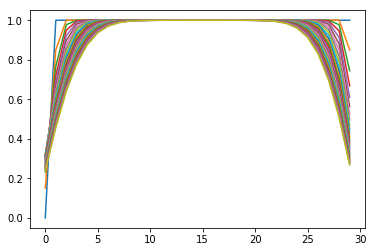

In [39]:
#Given the above PDE

def heatEquationSolver_MatrixIteration(N,M,t_max,x_max,sigma,T0):
    dx = x_max/M
    dt = t_max/N
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    f = np.zeros([N,M])
    f[0,:] = T0
    f[:,0] = 0
    alpha = 0.5*sigma*sigma * dt/(dx * dx)
    A = np.diag([1-2*alpha]*(M),k=0) + np.diag([alpha]*(M-1), k=1) + np.diag([alpha]*(M-1), k=-1) 
    for n in range(0,N-1):
            f[n+1,:] = A.dot(f[n,:])
    return t,f,alpha

y,X_matrix,a = heatEquationSolver_MatrixIteration(N,M,t_max,x_max,sigma,T0)

print(np.shape(X_matrix[N-1,:]))
print(X_matrix[N-1,:])

for i in range(0,N-1):
    plt.plot(X_matrix[i,:])

plt.show()
#for i in np.arange(0,N-1,1):
#    plt.plot(X_matrix[i,:])
#plt.xlim(y[0],y[-1])
#plt.show()

#### Implicit Finite Differences Method

In this case, we are considering the $i+1$ step in time:
$$ f(t_{i+1},x_j)-f(t_{i}, x_j) =   \frac{1}{2}\sigma^2 \frac{\Delta t}{(\Delta x)^2}\left(f(t_{i+1},x_{j+1}) - 
2f(t_{i+1},x_j) +f(t_{i+1},x_{j-1}) \right)$$
$$ \alpha := \frac{1}{2}\sigma^2 \frac{\Delta t}{(\Delta x)^2}$$
$$ f(i,j) := f(t_{i}, x_{j})$$

$$f(i,j) = f(i+1,j) - \alpha\left(f(i+1,j+1) - 2f(i+1,j) +f(i+1,j-1) \right)$$
$$f(i,j) = -\alpha f(i+1, j+1) + (1+2\alpha)f(i+1,j) - \alpha f(i+1,j-1)  $$
$$i\in(0,1,\dots N) \quad j \in (0,1,\dots,M)$$

$$\begin{bmatrix}
1+2\alpha &  -\alpha    & 0        &      0 &\dots   & 0\\
-\alpha    &  1+2\alpha & -\alpha   &      0 &\dots   & 0\\
0         & -\alpha     & 2\alpha& -1&\dots   & 0\\
\vdots    & \vdots     & \vdots   & \vdots &\vdots  & \vdots\\
0         &  0         &   0      & 0      & -\alpha & 1+2\alpha
\end{bmatrix}
\begin{bmatrix}
f(i+1,0)\\
f(i+1,1)\\
f(i+1,2)\\
\vdots \\
f(i+1,M)
\end{bmatrix} = 
\begin{bmatrix}
f(i,0)\\
f(i,1)\\
f(i,2)\\
\vdots \\
f(i,M)
\end{bmatrix}
$$

$$\begin{bmatrix}
2\alpha-1 &  -\alpha    & 0        &      0 &\dots   & 0\\
-\alpha    &  2\alpha-1 & -\alpha   &      0 &\dots   & 0\\
0         & -\alpha     & 2\alpha& -1&\dots   & 0\\
\vdots    & \vdots     & \vdots   & \vdots &\vdots  & \vdots\\
0         &  0         &   0      & 0      & -\alpha & 2\alpha-1
\end{bmatrix}^{-1}
\begin{bmatrix}
f(i,0)\\
f(i,1)\\
f(i,2)\\
\vdots \\
f(i,M)
\end{bmatrix} = 
\begin{bmatrix}
f(i+1,0)\\
f(i+1,1)\\
f(i+1,2)\\
\vdots \\
f(i+1,M)
\end{bmatrix}
$$


##### Consequence: it is the same "forward" matrix iteration
##### Aim: setting up a 'tri-diagonal' matrix, calculate the inverse of it and iterate it through each time step

$$\textbf{B} : = \begin{bmatrix}
1+2\alpha &  -\alpha    & 0        &      0 &\dots &0& 0\\
-\alpha    &  1+2\alpha & -\alpha   &      0 &\dots &0& 0\\
0         & -\alpha     & 1+2\alpha& -\alpha &\dots &0& 0\\
\vdots    & \vdots     & \vdots   & \vdots &\ddots & \vdots & \vdots\\
0         &  0         &   0      & 0      & \dots &   -\alpha & 1+2\alpha
\end{bmatrix}$$

$$
\underline{\textbf{f}}_i =\begin{bmatrix}
f(i,0)\\
f(i,1)\\
f(i,2)\\
\vdots \\
f(i,M)
\end{bmatrix}
$$

$$\Rightarrow\quad \underline{\textbf{f}}_{j+1} = B^{-1} * \underline{\textbf{f}}_i$$

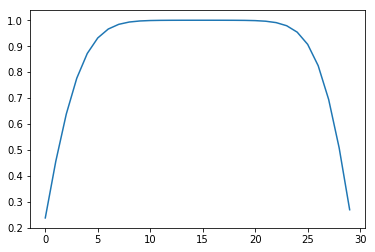

[[7.79754132e-01 9.12024759e-02 1.06673261e-02 1.24768374e-03
  1.45932983e-04 1.70687770e-05 1.99641740e-06 2.33507208e-07
  2.73117315e-08 3.19446533e-09 3.73634631e-10 4.37014721e-11
  5.11146051e-12 5.97852368e-13 6.99266781e-14 8.17884243e-15
  9.56622927e-16 1.11889602e-16 1.30869569e-17 1.53069131e-18
  1.79034431e-19 2.09404256e-20 2.44925751e-21 2.86472799e-22
  3.35067523e-23 3.91905428e-24 4.58384800e-25 5.36139808e-26
  6.26970091e-27 7.23427028e-28]
 [9.12024759e-02 7.90421458e-01 9.24501597e-02 1.08132591e-02
  1.26475252e-03 1.47929400e-04 1.73022842e-05 2.02372914e-06
  2.36701673e-07 2.76853662e-08 3.23816680e-09 3.78746091e-10
  4.42993244e-11 5.18138719e-12 6.06031210e-13 7.08833011e-14
  8.29073203e-15 9.69709884e-16 1.13420293e-16 1.32659913e-17
  1.55163173e-18 1.81483688e-19 2.12268984e-20 2.48276426e-21
  2.90391853e-22 3.39651371e-23 3.97266826e-24 4.64654500e-25
  5.43374078e-26 6.26970091e-27]
 [1.06673261e-02 9.24501597e-02 7.90567391e-01 9.24672284e-02
  1.

In [36]:
#Given the above PDE

def heatEquationSolver_MatrixIterationInv(N,M,t_max,x_max,sigma,T0):
    dx = x_max/M
    dt = t_max/N
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    f = np.zeros([N,M])
    f[0,:] = T0
    f[:,0] = 0
    alpha = 0.5*sigma*sigma * dt/(dx * dx)
    mainDiag = np.zeros(M)
    mainDiag = [1+2*alpha]*(M)
    upperDiag = np.zeros(M-1)
    upperDiag =  [-alpha]*(M-1)
    lowerDiag = np.zeros(M-1)
    lowerDiag = [-alpha]*(M-1)
    
    B = np.diag(mainDiag,k=0) + np.diag(upperDiag, k=1) + np.diag(lowerDiag, k=-1)
    invB = np.linalg.inv(B)
    for n in range(0,N-1):
        f[n+1,:] = invB.dot(f[n,:])
    return t,f,alpha, B

y,X_matrixInv,a,B = heatEquationSolver_MatrixIterationInv(N,M,t_max,x_max,sigma,T0)
plt.plot(X_matrixInv[-1,:])
plt.show()
print(np.linalg.inv(B))

In [57]:
def VanillaOption_Explicit(
                  S_0,
                  T,
                  K,
                  r,
                  q,
                  sigma,
                  Time_Steps,
                  Space_Steps,
                  isCall,
                  isAmerican):
    outVector = np.zeros((2,1),dtype = float)
    S_max =  2.0*S_0
    S_min = 0.0
    #Discretization of the Stock and the Time
    dS=(S_max-S_min)/float(Space_Steps)   
    dt=T/float(Time_Steps)
    FV=np.zeros((Time_Steps+1,Space_Steps+1))
    j=np.arange(1,Space_Steps,dtype=np.float)   
    #'Transition Probabilities'
    lower=(-0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    diag=(1.0-sigma**2*dt*j**2)/(1.0+r*dt)
    upper=(0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    #The matrix from the transition probabilities
    A=np.diag(diag)+np.diag(lower[1:Space_Steps-1],k=-1)+np.diag(upper[0:Space_Steps-2],k=1)
    infinityNormOfA = np.linalg.norm(A,np.inf)
    outVector[1] = infinityNormOfA
    #The matrix for the option price
    #N+1: Time Steps
    #M+1: Stock Steps   
    #Set up the boundary conditions//Contract dependent
    if(bool(isCall)):
        FV[:,0]=S_min
        FV[:,Space_Steps]=[S_max * np.exp(-r*( Time_Steps - j)*dt)-K for j in range(Time_Steps+1)]
        FV[Time_Steps,:]=np.maximum(np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float)-K,0)
    else:
        FV[:,0]=[K * np.exp(-r*( Time_Steps - j)*dt) for j in range(Time_Steps+1)]
        FV[:,Space_Steps]=0
        FV[Time_Steps,:]=np.maximum(K-np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float),0)
    
    FV=np.matrix(np.array(FV))
    #Start the Backward Iteration
    for i in range(Time_Steps-1,-1,-1):
        k_i=np.zeros((Space_Steps-1,1))
        #Inserts the first and the last element
        k_i[0]=lower[0]*FV[i+1,0] 
        k_i[Space_Steps-2]=upper[Space_Steps-2]*FV[i+1,Space_Steps]
        
        FV[i,1:Space_Steps]=np.dot(FV[i+1,1:Space_Steps],A)+np.matrix(np.array(k_i)).transpose()
        
        if(bool(isAmerican)):
            if(bool(isCall)):
                FV[i,:] = np.maximum(np.arange(S_min,S_max+dS/2,dS,dtype=float)-K,FV[i,:]) 
            else:
                FV[i,:] = np.maximum(K-np.arange(S_min,S_max+dS/2,dS,dtype=float),FV[i,:])
        outVector[0] = FV[0,(int)((FV.shape[1]+1)/2)]
    return outVector


S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=50
Space_Steps=22
isCall = 1
isAmerican = 0
print(VanillaOption_Explicit(
                    S_0,
                    T,
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican))


[[7.58665005]
 [0.99837824]]


In [58]:

import math as math
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / np.sqrt(2.0))) / 2.0

def BlackScholes(S,
                 T,
                 K,
                 r,
                 q,
                 sigma,
                 isCall):
    d1=(np.log(S/K)+T*(r-q+0.5*sigma**2))/(sigma*np.sqrt(T))
    d2=d1-np.sqrt(T)*sigma
    if(bool(isCall)):
            return S*phi(d1)- math.exp(-(r)*T)*K*phi(d2)
    else:
        return math.exp(-r*T)*K*phi(-d2)-S*phi(-d1) 
x=BlackScholes(S_0,T,K,r,q,sigma,isCall)
print(x)

7.487895389155643


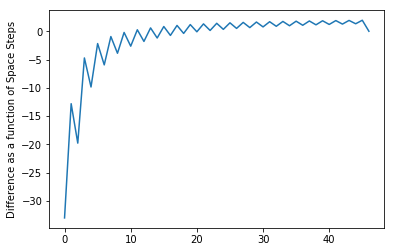

In [67]:
#Numerical Convergence
TimeSteps=np.arange(10,156,5)
SpaceSteps = np.arange(2,50,1)
vecDiffs=np.zeros(SpaceSteps.shape[0]-1)
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=100
Space_Steps=50
isCall = 1
isAmerican = 0
for i in range(0,SpaceSteps.shape[0]-2):
    vecDiffs[i] = x - VanillaOption_Explicit(
                        S_0,
                        T,
                        K,
                        r,
                        q,
                        sigma,
                        Time_Steps,
                        SpaceSteps[i],
                        isCall,
                        isAmerican)[0,0]
plt.plot(vecDiffs)
plt.ylabel("Difference as a function of Space Steps")
plt.show()